In [4]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start='2013-01-01'
end='2023-01-01'
stock='JPM'
data = yf.download(stock,start,end)


[*********************100%%**********************]  1 of 1 completed


In [3]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882118,31413000
2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815849,24227700
2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397495,24487700
2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434311,24456900
2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500576,19624200
...,...,...,...,...,...,...
2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837593,8827700


In [8]:
ma_100=data.Close.rolling(100).mean()


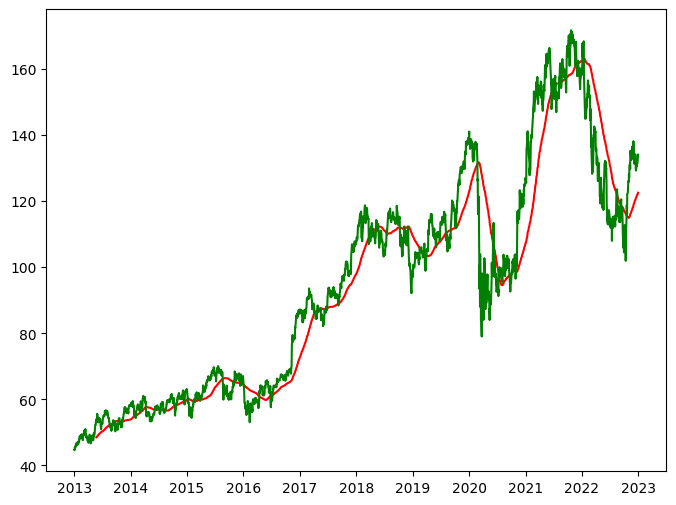

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100, 'r')
plt.plot(data.Close, 'g')
plt.show()


In [10]:
ma_200=data.Close.rolling(200).mean()


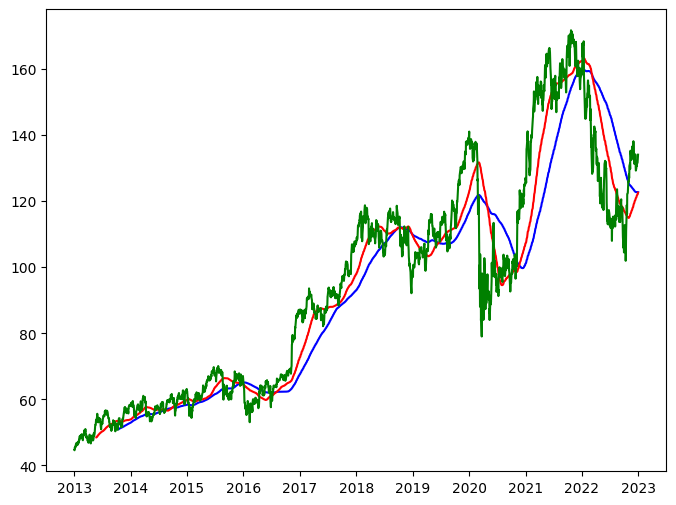

In [15]:
plt.figure(figsize=(8,6))
plt.plot(ma_200, 'b')
plt.plot(ma_100, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [17]:
data.dropna(inplace=True)

In [27]:
train_data=pd.DataFrame(data.Close[0: int (len(data)*0.80)])
test_data=pd.DataFrame(data.Close[int (len(data)*0.80):len (data) ])

In [28]:
train_data.shape[0]


2014

In [29]:
test_data.shape[0]

504

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_scale=scaler.fit_transform(train_data)


In [31]:
x=[]
y=[]

for i in range (100,train_data.shape[0]):
   x.append(train_data_scale[i-100:i])
   y.append(train_data_scale[i,0])


In [32]:
x,y=np.array(x),np.array(y)

In [38]:
from keras.layers import Dense, Dropout, LSTM
import keras.models
model=keras.models.Sequential()

model.add(LSTM(units= 50, activation= 'relu', return_sequences= True, input_shape=((x.shape[1],1)) ))
model.add(Dropout(0.2))
model.add(LSTM(units= 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))




In [40]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [41]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
60/60 [==============================] - 20s 242ms/step - loss: 0.0498
Epoch 2/50
60/60 [==============================] - 15s 245ms/step - loss: 0.0115
Epoch 3/50
60/60 [==============================] - 15s 243ms/step - loss: 0.0086
Epoch 4/50
60/60 [==============================] - 15s 243ms/step - loss: 0.0086
Epoch 5/50
60/60 [==============================] - 15s 243ms/step - loss: 0.0083
Epoch 6/50
60/60 [==============================] - 15s 245ms/step - loss: 0.0076
Epoch 7/50
60/60 [==============================] - 16s 258ms/step - loss: 0.0080
Epoch 8/50
60/60 [==============================] - 15s 246ms/step - loss: 0.0076
Epoch 9/50
60/60 [==============================] - 15s 242ms/step - loss: 0.0073
Epoch 10/50
60/60 [==============================] - 15s 243ms/step - loss: 0.0059
Epoch 11/50
60/60 [==============================] - 15s 242ms/step - loss: 0.0063
Epoch 12/50
60/60 [==============================] - 15s 244ms/step - loss: 0.0059
Epoch 13/50
6

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [43]:
last_100_days=train_data.tail(100)



In [44]:
test_data=pd.concat([last_100_days,test_data],ignore_index=True)

In [46]:
test_data


,Close
0,100.639999
1,103.820000
2,102.940002
3,102.370003
4,102.410004
...,...
599,131.279999
600,131.740005
601,132.460007
602,133.220001


In [47]:
test_data_scale=scaler.fit_transform(test_data)

In [55]:
x = []
y = []

for i in range(100, test_data.shape[0]):
  x.append(test_data_scale[i - 100:i])
  y.append(test_data_scale[i, 0])

x, y = np.array(x), np.array(y)

In [56]:
y_predict=model.predict(x)

16/16 [==============================] - 1s 69ms/step


In [57]:
y_predict


array([[0.42425686],
       [0.4270569 ],
       [0.42885384],
       [0.42980027],
       [0.43015793],
       [0.43108904],
       [0.4347669 ],
       [0.44461408],
       [0.461462  ],
       [0.4839396 ],
       [0.5096981 ],
       [0.53404444],
       [0.55270886],
       [0.56292224],
       [0.5652844 ],
       [0.5612664 ],
       [0.5528064 ],
       [0.5414834 ],
       [0.52863526],
       [0.51532584],
       [0.5023677 ],
       [0.49026772],
       [0.479361  ],
       [0.47081673],
       [0.46740133],
       [0.47233668],
       [0.48556256],
       [0.5049116 ],
       [0.5267741 ],
       [0.5469805 ],
       [0.5633442 ],
       [0.5765572 ],
       [0.5877527 ],
       [0.5977793 ],
       [0.6081171 ],
       [0.61991715],
       [0.633677  ],
       [0.64988744],
       [0.66682696],
       [0.67972577],
       [0.6873815 ],
       [0.6898577 ],
       [0.68972373],
       [0.68794715],
       [0.6853601 ],
       [0.6837363 ],
       [0.6836676 ],
       [0.686

In [59]:
scale=1/scaler.scale_

In [60]:
y_predict=y_predict*scale

y=y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

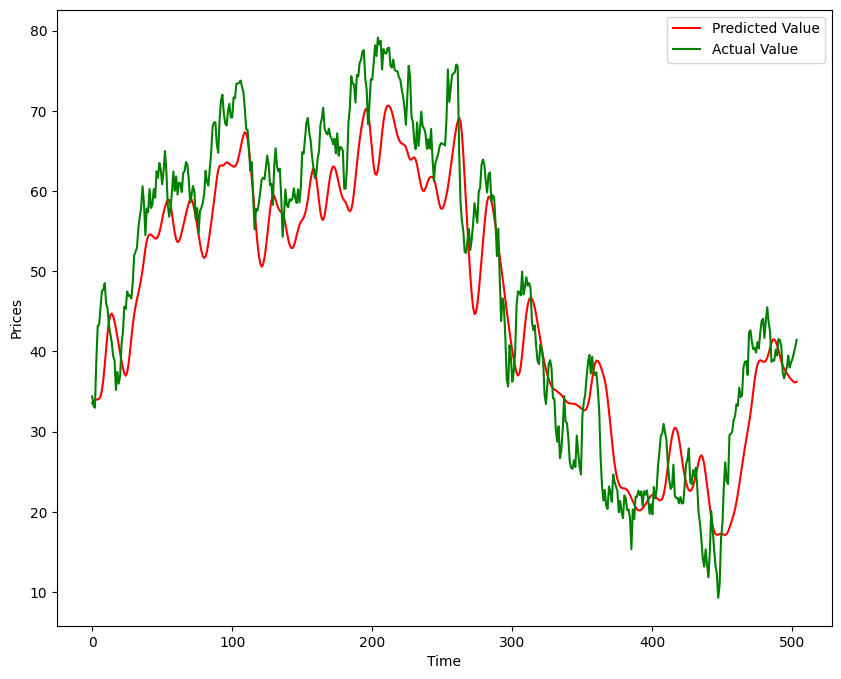

In [65]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Value')
plt.plot(y,'g',label='Actual Value')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show

In [66]:
model.save('WIDS')